# 1. Information about the submission

## 1.1 Name and number of the assignment 

***Enter here** name and number of the assignment*

Petr Sokerin Homework Assignment 1

## 1.2 Student name

***Enter here** your Name and Surname in this order*


Petr Sokerin

## 1.3 Codalab user ID

***Enter here** your Codalab user ID used to submit your run to shared task*

petr_sokerin

## 1.4 Additional comments

***Enter here** any additional comments which you would like to communicate to a TA who is going to grade this work not related to the content of your submission.*

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology 

for solving tasks of WSI I implement 3 steps for solving this problem:

- text preprocessing (including tockenization and lemmatization)
- vectorization of the text
- clustering data

**1. text preprocessing**

Preprocessing can bacome a key part of feature engineering what have a big influence on the result. Firstly for all datasets I prefer to work with whole context data to vectorize, excepting dropping keyword (word for what we solvethe task of WSI). It's need because in many vectorization system keyword can have different meanings and it make our vector is not so clear. 

I also tried to word not only with entire texts, but with nearest to keyword words with different sizes of window but results of whis procedure become much worse, so I choose to use all context avaliable for me.

My preprocessing include some steps: 
- dropping stopwords for russian languages (I identify stop words with familiar package nltk for russian language) 
- dropping punctuation with regular expressions
- lemmatization. For lemmatization I used package pymystem3. I would like also to emphasize that for vectorization some word with pretrained models and packages using of stemming is really bad idea because it can just cut a word, but cutting words can be not implemented in pretrained models, so it's highly but idea to use stemming for vectorization with different parametrs.

**2. vectorization**

I used some methods for vectorization: TF-IDF, model Doc2vec, pretrained Bert model and package Natasha for vectorization.


***1) TF-IDF*** (TF — term frequency, IDF — inverse document frequency). This is method of vectorization of the text that include to part: TF and IDF.

$$tf(t,d) = \frac{f_{t,d}}{\Sigma_{t^{'}\in d} f_{t^{'},d}}$$

where $f_{t,d}$ is the raw count of a term in a document, i.e., the number of times that term t occurs in document d. 

$$idf(t,D) = log \frac{N}{|d \in D : t \in d|}$$

where N - total number of documents in corpus, D - corpus.

Besides, I used min size of df (0.01) and max size of df (0.9) to prevent including in datasets too frequant or very less frequant words, used ngrams of size 1-3. In aim not to get too get very high-dimention vector, I set a vector size equal to 600.


***2) Doc2vec***. Model Doc2vec was implemented and trained with 50 epoches with our current dataset. Vector size was choosen equal 500 and sizeof window is equal to 3. This model is aimed for vectorization of long texts and can be useful with tockenization of dataset Wiki-wiki that have very long context for every example. This model was imported from gensim package.

***3) Bert***. As a state-of-the-art model for vectorisation I prefer to use Bert model trained on different russian datasets. I tried to implement different pretrained bert implementation with different sizes of vectors:
- cointegrated/rubert-tiny
- bert-base-multilingual-cased
- DeepPavlov/rubert-base-cased-sentence
- sberbank-ai/sbert_large_nlu_ru

the best results I gotted with bert implementation from sberbank AI. Vector size of embeddings is equal 1024. 

This model can work with different words, so to get a vector implementation of entire context I use the average vector of all words staid in text after lemmatization. 

***4) Natasha***. As a fast vectorization I used vectorizer of words from Natasha package. I return vector of size 300 for every word, so, as in previous case I work with average vector of words. 

***5) Word2vec and Word2vec2***. I also used pretrained model Word2Vec with "word2vec-ruscorpora-300" as trained dataset. This dataset conains only tag words so I used pymystem3 module for lemmatization raw text and tagging it (for this vectorizer I used raw context because it was needed for part-of-speech tagging). As for bert I used average vector for all words in context as a vector for context. For model word2vec2 I used the same steps, but used written function "fingerprint from project russian wsi (https://github.com/akutuzov/russian_wsi)

**3. Clustering**

For clustering results of vactorization and get prediction of "meaning" of the words I used 4 method of clusterring with different logic of work. 

***K-Means*** This method randomly choose k (hyperparametr of model) centerse of clusers and try itteratevely get the best position for data. Actually in this task logically use methods that choose number of clusters by them-selve, however K-Means perform one of the best results inthis task. The best number of clustering was chosen equal to 3 by gid search. 

***Agglomerative Clustering*** This method of itteratively group 2 nearest groups of data, bulding dendrogram. Actually, this method can be one of most appropriated for our task because you can number of clusters not only manually, but according to distance between clusters. Actually, in my case model perform the best if I manually use number of clusters equal to 2. 

***DBSCAN*** One of the state-of-the-art (not in my case) method for clustering. It work trying to find points nearest to chosen and group them in one cluster. 

![image](https://cf2.ppt-online.org/files2/slide/o/O8Uhj39wT6SM2KRNgAXfkYBGxWbqPJarHv0ipt/slide-21.jpg)

***Affinity clustering*** One another model for clusterring is affinity clustering. Tha advantage of this method is automatic generating number of clusters. Besides, a lot of scientists in their works recommend to use this model for wsi task.

## 2.2 Discussion of results

Below we can see tables with results of different clustering and vectorization methods

## wiki_wiki

![image](wiki_res.png)

As we can see the best models for wiki-wiki dataset becomes KMeans and Agglomerative clustering. The reason of it can be that for this dataset we have only 2 meanings for each other word. The best results of vectorization have word2vec2, Natasha and Bert factorization. It can be explained long contexts with big amount ofspecific words. For KMeans and Agglomerative clusters there will be provided method of search optimal number of clusters. Both models have the best results with 2 clusters. As a final model to submit model KMeans with 2 clusters was chosen.


![image](btc_res.png)

For dataset bts results much worse because this dataset contains more values of words. Adecvate results of this model was in Natasha and Word2vec2 vectorization and for models Agglomerative clustering and KMeans. It can be explained by much less context for data, and that models Kmeans and Agglomerative clustering work much better that other because working with fixed number of clusters. The reason of it can be difficulties in vectorization process. For this models I also provide grid seach connected with optimal parameters for models. The best results was reached with agglomerative clustering with 3 clusters


![image](active_res.png)

Active-dict dataset was hardest one for the taks of wsi. For this model more or less adecvate results were reached with Affinity clustering and KMeans clustering. It can be explained with more amout of possible meanings of words in this dataset. With fine-tuning of Kmeans on this dataset optimal number of clusters was chosen equal to 5. 

All in all, for the task of wsi highly recommended to use pretrained model like word2vec or bect for clustering because self-trained methods show really bad results. The best models for clustering was KMeans< Agglomerative clustering and for some difficult cases Affinity clustering

# 3. Code

*Enter here all code used to produce your results submitted to Codalab. Add some comments and subsections to navigate though your solution.*

*In this part you are expected to develop yourself a solution of the task and provide a reproducible code:*
- *Using Python 3;*
- *Contains code for installation of all dependencies;*
- *Contains code for downloading of all the datasets used*;
- *Contains the code for reproducing your results (in other words, if a tester downloads your notebook she should be able to run cell-by-cell the code and obtain your experimental results as described in the methodology section)*.


*As a result, you code will be graded according to these criteria:*
- ***Readability**: your code should be well-structured preferably with indicated parts of your approach (Preprocessing, Model training, Evaluation, etc.).*
- ***Reproducibility**: your code should be reproduced without any mistakes with “Run all” mode (obtaining experimental part).*


## 3.1 Requirements

In [1]:
!pip install spacy
# and some other your dependenciesb

In [2]:
!pip install transformers sentencepiece

In [3]:
!pip install navec

In [96]:
!pip install requests

In [95]:
!pip install pymystem3

In [100]:
!pip install transformers

In [4]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [5]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer_bert = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model_bert = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")

In [6]:
import sys
import requests
from pymystem3 import Mystem

In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import re
from pymystem3 import Mystem

from tqdm.notebook import tqdm

from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.feature_extraction.text import TfidfVectorizer

from __future__ import print_function
import argparse
from pandas import read_csv
from sklearn.metrics import adjusted_rand_score

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import gensim

from gensim.models import Word2Vec

## 3.2 Download the data

In [8]:
# try:
#     from google.colab import drive
#     drive.mount('/content/drive')
#     path_to_data = "/content/drive/MyDrive/Skoltech/Statical_NLP/russe-wsi-kit/data/main/"
# except:
#     path_to_data = 'russe-wsi-kit/data/main/'
path_to_data = 'russe-wsi-kit/data/main/'

### wiki-wiki

In [9]:
df_wiki_train = pd.read_csv(f"{path_to_data}wiki-wiki/train.csv", sep='\t')
df_wiki_test = pd.read_csv(f"{path_to_data}wiki-wiki/test_new.csv", sep='\t')

unique_words_train = df_wiki_train.word.unique()
unique_words_test = df_wiki_test.word.unique()

print(df_wiki_train.shape)
print(unique_words_train)
df_wiki_train.head()

(439, 6)
['замок' 'лук' 'суда' 'бор']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,замок,1,NaN,"0-5, 339-344",замок владимира мономаха в любече . многочисле...
1,2,замок,1,NaN,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный..."
2,3,замок,1,NaN,299-304,проведения архитектурно - археологических рабо...
3,4,замок,1,NaN,111-116,"топи с . , л . белокуров легенда о завещании м..."
4,5,замок,1,NaN,"134-139, 262-267",великий князь литовский гедимин после успешной...


In [10]:
df_wiki_train_adagram = pd.read_csv(f"{path_to_data}wiki-wiki/train.baseline-adagram.csv", sep='\t')


unique_words_train_adagram = df_wiki_train_adagram.word.unique()

print(df_wiki_train_adagram.shape)
print(unique_words_train_adagram)
df_wiki_train_adagram.head()

(439, 6)
['замок' 'лук' 'суда' 'бор']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,замок,1,1,"0-5, 339-344",замок владимира мономаха в любече . многочисле...
1,2,замок,1,1,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный..."
2,3,замок,1,1,299-304,проведения архитектурно - археологических рабо...
3,4,замок,1,1,111-116,"топи с . , л . белокуров легенда о завещании м..."
4,5,замок,1,1,"134-139, 262-267",великий князь литовский гедимин после успешной...


In [11]:
print(df_wiki_test.shape)
print(unique_words_test)
df_wiki_test.head()

(618, 6)
['банка' 'белка' 'бит' 'горе' 'граф' 'душ']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,440,банка,NaN,NaN,"7-12, 36-41",здание банка китая ( макао ) здание банка кита...
1,441,банка,NaN,NaN,"13-18, 201-206",трехлитровая банка во времена ссср такие банки...
2,442,банка,NaN,NaN,"21-26, 58-63, 101-106, 263-268, 538-543",здание национального банка украины в здании на...
3,443,банка,NaN,NaN,"134-139, 262-267, 345-350",зюдфиртель города эссен ( федеральная земля се...
4,444,банка,NaN,NaN,"43-48, 300-305, 381-386, 521-526",ведения боевых действий полевые учреждения бан...


### btc-rnc

In [12]:
df_btc_train = pd.read_csv(f"{path_to_data}bts-rnc/train.csv", sep='\t')
df_btc_test = pd.read_csv(f"{path_to_data}bts-rnc/test.csv", sep='\t')

unique_words_train = df_btc_train.word.unique()
unique_words_test = df_btc_test.word.unique()

print(df_btc_train.shape)
print(unique_words_train)
df_btc_train.head()

(3491, 6)
['балка' 'вид' 'винт' 'горн' 'губа' 'жаба' 'клетка' 'крыло' 'купюра'
 'курица' 'лавка' 'лайка' 'лев' 'лира' 'мина' 'мишень' 'обед' 'оклад'
 'опушка' 'полис' 'пост' 'поток' 'проказа' 'пропасть' 'проспект' 'пытка'
 'рысь' 'среда' 'хвост' 'штамп']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,балка,1,NaN,90-94,"маленькой комнаты. Он был очень высок, наклони..."
1,2,балка,1,NaN,69-73,Пантюхин в Склифе сейчас. Он выползти на улицу...
2,3,балка,1,NaN,115-121,равнозначно обеспечивает и меланхоличную езду....
3,4,балка,1,NaN,85-90,"верхняя часть закрыта, замкнута, многократно о..."
4,5,балка,1,NaN,66-70,"по телевизору: наши гол забили, я вскочил от р..."


In [13]:
df_btc_train_adagram = pd.read_csv(f"{path_to_data}bts-rnc/train.baseline-adagram.csv", sep='\t')


unique_words_train_adagram = df_btc_train_adagram.word.unique()

print(df_btc_train_adagram.shape)
print(unique_words_train_adagram)
df_btc_train_adagram.head()

(3491, 6)
['балка' 'вид' 'винт' 'горн' 'губа' 'жаба' 'клетка' 'крыло' 'купюра'
 'курица' 'лавка' 'лайка' 'лев' 'лира' 'мина' 'мишень' 'обед' 'оклад'
 'опушка' 'полис' 'пост' 'поток' 'проказа' 'пропасть' 'проспект' 'пытка'
 'рысь' 'среда' 'хвост' 'штамп']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,балка,1,3,90-94,"маленькой комнаты. Он был очень высок, наклони..."
1,2,балка,1,4,69-73,Пантюхин в Склифе сейчас. Он выползти на улицу...
2,3,балка,1,1,115-121,равнозначно обеспечивает и меланхоличную езду....
3,4,балка,1,3,85-90,"верхняя часть закрыта, замкнута, многократно о..."
4,5,балка,1,4,66-70,"по телевизору: наши гол забили, я вскочил от р..."


In [14]:
print(df_btc_test.shape)
print(unique_words_test)
df_btc_test.head()

(6556, 6)
['акция' 'баба' 'байка' 'бум' 'бычок' 'вал' 'газ' 'гвоздика' 'гипербола'
 'град' 'гусеница' 'дождь' 'домино' 'забой' 'икра' 'кабачок' 'капот'
 'карьер' 'кличка' 'ключ' 'кок' 'кольцо' 'концерт' 'котелок' 'крона'
 'круп' 'кулак' 'лейка' 'лук' 'мандарин' 'ножка' 'опора' 'патрон' 'печать'
 'пол' 'полоз' 'почерк' 'пробка' 'рак' 'рок' 'свет' 'секрет' 'скат' 'слог'
 'стан' 'стопка' 'таз' 'такса' 'тюрьма' 'шах' 'шашка']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,3492,акция,NaN,NaN,104-108,"точными сведениями осенью. Напомним, что снача..."
1,3493,акция,NaN,NaN,79-83,"пакет акций. «Все зависит от того, насколько р..."
2,3494,акция,NaN,NaN,70-74,"в ЕГРЮЛ только 5 октября 2012 года, а госрегис..."
3,3495,акция,NaN,NaN,67-71,"8%, а бумаги Дальсвязи подорожали на 4,4%. Вме..."
4,3496,акция,NaN,NaN,90-94,", пожилые - у нас много категорий граждан, кот..."


### active-dict

In [15]:
df_active_train = pd.read_csv(f"{path_to_data}active-dict/train.csv", sep='\t')
df_active_test = pd.read_csv(f"{path_to_data}active-dict/test.csv", sep='\t')

unique_words_train = df_active_train.word.unique()
unique_words_test = df_active_test.word.unique()

print(df_active_train.shape)
print(unique_words_train)
df_active_train.head()

(2073, 6)
['дар' 'двигатель' 'двойник' 'дворец' 'девятка' 'дедушка' 'дежурная'
 'дежурный' 'декабрист' 'декрет' 'дело' 'демобилизация' 'демократ'
 'демонстрация' 'дерево' 'держава' 'дерзость' 'десятка' 'десяток'
 'деятель' 'диалог' 'диаметр' 'диплом' 'директор' 'диск' 'дичь' 'длина'
 'доброволец' 'добыча' 'доказательство' 'доктор' 'долгота' 'доля' 'дом'
 'дорога' 'достижение' 'древесина' 'дупло' 'дура' 'дух' 'дым' 'дымка'
 'дыхание' 'дьявол' 'евро' 'езда' 'жаворонок' 'жало' 'жертва' 'жестокость'
 'жидкость' 'жила' 'жилец' 'жир' 'жребий' 'заведение' 'завещание'
 'зависимость' 'заголовок' 'заготовка' 'задание' 'задача' 'задержка'
 'зажигалка' 'закон' 'закрытие' 'заложник' 'замена' 'западня' 'запятая'
 'застой' 'затея' 'затишье' 'затмение' 'затруднение' 'захоронение'
 'звезда' 'звон' 'зеркало' 'зло' 'злоупотребление' 'знак' 'знамя'
 'значение' 'зонт']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,дар,1,NaN,18-22,Отвергнуть щедрый дар
1,2,дар,1,NaN,21-28,покупать преданность дарами и наградами
2,3,дар,1,NaN,19-23,Вот яд – последний дар моей Изоры
3,4,дар,1,NaN,81-87,Основная функция корильных песен – повеселить ...
4,5,дар,1,NaN,151-157,Но недели две спустя (Алевтина его когда-то об...


In [16]:
df_active_train_adagram = pd.read_csv(f"{path_to_data}active-dict/train.baseline-adagram.csv", sep='\t')


unique_words_train_adagram = df_active_train_adagram.word.unique()

print(df_active_train_adagram.shape)
print(unique_words_train_adagram)
df_active_train_adagram.head()

(2073, 6)
['дар' 'двигатель' 'двойник' 'дворец' 'девятка' 'дедушка' 'дежурная'
 'дежурный' 'декабрист' 'декрет' 'дело' 'демобилизация' 'демократ'
 'демонстрация' 'дерево' 'держава' 'дерзость' 'десятка' 'десяток'
 'деятель' 'диалог' 'диаметр' 'диплом' 'директор' 'диск' 'дичь' 'длина'
 'доброволец' 'добыча' 'доказательство' 'доктор' 'долгота' 'доля' 'дом'
 'дорога' 'достижение' 'древесина' 'дупло' 'дура' 'дух' 'дым' 'дымка'
 'дыхание' 'дьявол' 'евро' 'езда' 'жаворонок' 'жало' 'жертва' 'жестокость'
 'жидкость' 'жила' 'жилец' 'жир' 'жребий' 'заведение' 'завещание'
 'зависимость' 'заголовок' 'заготовка' 'задание' 'задача' 'задержка'
 'зажигалка' 'закон' 'закрытие' 'заложник' 'замена' 'западня' 'запятая'
 'застой' 'затея' 'затишье' 'затмение' 'затруднение' 'захоронение'
 'звезда' 'звон' 'зеркало' 'зло' 'злоупотребление' 'знак' 'знамя'
 'значение' 'зонт']


,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,дар,1,3,18-22,Отвергнуть щедрый дар
1,2,дар,1,3,21-28,покупать преданность дарами и наградами
2,3,дар,1,3,19-23,Вот яд – последний дар моей Изоры
3,4,дар,1,4,81-87,Основная функция корильных песен – повеселить ...
4,5,дар,1,1,151-157,Но недели две спустя (Алевтина его когда-то об...


In [17]:
print(df_active_test.shape)
print(unique_words_test)
df_active_test.head()

(3729, 6)
['давление' 'дама' 'данные' 'дата' 'двойка' 'двор' 'дворник' 'девка'
 'девочка' 'девушка' 'девчонка' 'дед' 'дезертир' 'действие'
 'действительность' 'декларация' 'декорация' 'делегат' 'деление' 'дельфин'
 'демократия' 'день' 'деньги' 'деревня' 'десант' 'десерт' 'деталь'
 'детектив' 'дети' 'деятельность' 'диагональ' 'диво' 'диета' 'дикарь'
 'диктатор' 'дипломатия' 'дискант' 'дистанция' 'дитя' 'дневник' 'днище'
 'дно' 'добро' 'добродетель' 'доверие' 'дождь' 'доза' 'доклад' 'документ'
 'долг' 'должник' 'доллар' 'дополнение' 'дорожка' 'досада' 'доска'
 'достаток' 'достоинство' 'достояние' 'доступ' 'дочь' 'дощечка'
 'драгоценность' 'драма' 'дробь' 'дрова' 'дрожжи' 'дрожь' 'дружба' 'дрянь'
 'дуб' 'дубина' 'дуга' 'дурак' 'душ' 'душа' 'дуэт' 'дыня' 'дыра' 'дядя'
 'дятел' 'евреи' 'еда' 'единица' 'единство' 'ежевика' 'ель' 'ельник'
 'ерунда' 'жадность' 'жажда' 'жалоба' 'жалость' 'жар' 'железо' 'жемчуг'
 'жена' 'жених' 'жест' 'жизнь' 'жилка' 'жук' 'журавль' 'журнал' 'жуть'
 'забота' 'за

,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,2074,давление,NaN,NaN,0-9,Давление пара создается движением поршня в цил...
1,2075,давление,NaN,NaN,13-22,"«У тебя что, давление поднялось?» Я сказал, чт..."
2,2076,давление,NaN,NaN,56-65,Я жалуюсь Никоновичу наконец на головокружение...
3,2077,давление,NaN,NaN,0-9,Давление в котле не менялось
4,2078,давление,NaN,NaN,25-34,Он каждые два часа мерил давление и сахар в крови


In [18]:
f"{path_to_data}wiki-wiki/train.csv"

'russe-wsi-kit/data/main/wiki-wiki/train.csv'

## 3.3 Preprocessing 

In [19]:
labels = ['wiki', 'btc', 'active']
train_dfs = [df_wiki_train, df_btc_train, df_active_train]
test_dfs = [df_wiki_test, df_btc_test, df_active_test]

for i in range(len(labels)):
    train_loc = train_dfs[i]
    train_loc['label_ds'] = [labels[i]]*len(train_loc)
    train_dfs[i] = train_loc
    
    test_loc = test_dfs[i]
    test_loc['label_ds'] = [labels[i]]*len(test_loc)
    test_dfs[i] = test_loc

df_train = pd.concat(train_dfs)
df_train.index = range(len(df_train))

df_test = pd.concat(test_dfs)
df_test.index = range(len(df_test))

df_all = pd.concat([df_train, df_test])
df_all.index = range(len(df_all))
df_all['label_test'] = df_all['gold_sense_id'].isna()

print(df_train.shape)
df_train.head()

(6003, 7)


,context_id,word,gold_sense_id,predict_sense_id,positions,context,label_ds
0,1,замок,1,NaN,"0-5, 339-344",замок владимира мономаха в любече . многочисле...,wiki
1,2,замок,1,NaN,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный...",wiki
2,3,замок,1,NaN,299-304,проведения архитектурно - археологических рабо...,wiki
3,4,замок,1,NaN,111-116,"топи с . , л . белокуров легенда о завещании м...",wiki
4,5,замок,1,NaN,"134-139, 262-267",великий князь литовский гедимин после успешной...,wiki


In [20]:
dict_adagram = {'wiki':df_wiki_train_adagram,
                'btc':df_btc_train_adagram,
                'active':df_active_train_adagram}

In [21]:
df_all

,context_id,word,gold_sense_id,predict_sense_id,positions,context,label_ds,label_test
0,1,замок,1,NaN,"0-5, 339-344",замок владимира мономаха в любече . многочисле...,wiki,False
1,2,замок,1,NaN,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный...",wiki,False
2,3,замок,1,NaN,299-304,проведения архитектурно - археологических рабо...,wiki,False
3,4,замок,1,NaN,111-116,"топи с . , л . белокуров легенда о завещании м...",wiki,False
4,5,замок,1,NaN,"134-139, 262-267",великий князь литовский гедимин после успешной...,wiki,False
...,...,...,...,...,...,...,...,...
16901,5798,зуд,NaN,NaN,43-47,Многих американцев одолевает романтический зуд...,active,True
16902,5799,зуд,NaN,NaN,23-27,Если на нее не находил зуд рассказывания истор...,active,True
16903,5800,зуд,NaN,NaN,27-33,"С раздражающей завистью, с зудом неудовлетворе...",active,True
16904,5801,зуд,NaN,NaN,12-16,Нестерпимый зуд любопытства,active,True


In [22]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [23]:
from nltk.tokenize import RegexpTokenizer
import string

mystem = Mystem()
tokenizer = RegexpTokenizer(r'\w+')


def get_nearest_words(text, key_index, n_words):
    new_text = []
    for i in range(max(0, key_index - n_words), key_index):
        new_text.append(text[i])
        
    for i in range(key_index+1, min(len(text), key_index + n_words+1)):
        new_text.append(text[i])
        
    return new_text


def lemmatized_context(s, keyword, join_=False, k_nearests=0, drop_keyword=False):
    res = []
    s = mystem.lemmatize(s)
    keyword = mystem.lemmatize(keyword)[0]
    
    for i in range(len(s)):
        w = s[i]
        if re.match('\w+', w) and w not in stop_words and w not in string.punctuation:
            res.append(w)
            
    key_indexes = [i for i,x in enumerate(res) if x == keyword]
    
    if drop_keyword:
            for i in key_indexes[::-1]:
                del res[i]
    
    if k_nearests == 0 or len(res) < 10 or len(key_indexes) == 0:
        
        if join_:
            return ' '.join(res), key_indexes
        return res, key_indexes
    else:
        new_res = []
        for i in key_indexes:
            new_res += get_nearest_words(res, i, k_nearests)
        if join_:
            return ' '.join(new_res), key_indexes
        return new_res, key_indexes



In [24]:
texts = df_all['context'].values.tolist()
keywords = df_all['word'].values.tolist()

In [25]:
preprocessed_texts = []
keyword_indexes = []

# for i in tqdm(range(len(texts))):
#     res_lem, key_index = lemmatized_context(texts[i].lower(), keywords[i].lower(), 
#                                            join_=True, k_nearests=0, drop_keyword=True)
#     keyword_indexes.append(key_index)
#     preprocessed_texts.append(res_lem)               

In [26]:
# for i in range(len(preprocessed_texts)):
#     if len(preprocessed_texts[i]) == 0:
#         preprocessed_texts[i] = keywords[i]

In [27]:
# with open(f"{path_to_data}preprocessed_texts_2.pickle", 'wb') as f:
#     pickle.dump(preprocessed_texts, f)

In [28]:
with open(f"{path_to_data}preprocessed_texts_2.pickle", 'rb') as f:
    preprocessed_texts = pickle.load(f)

In [29]:
len(preprocessed_texts), len(df_all)

(16906, 16906)

## 3.4 My method of text processing

In [30]:
dict_vect = dict()

### TF-IDF

In [31]:
vector_len = 600

vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df = 0.01, max_df=0.9, max_features=vector_len)
vectors = vectorizer.fit_transform(preprocessed_texts)
dense_vectors = vectors.todense()

In [32]:
df_embed_train = pd.DataFrame(dense_vectors, columns = [f'tf_idf_{i}' for i in range(dense_vectors.shape[1])])
dict_vect['TD-IDF'] = df_all.iloc[:, :7].copy()
dict_vect['TD-IDF'] = pd.concat([dict_vect['TD-IDF'], df_embed_train], axis = 1)

In [33]:
print(dict_vect['TD-IDF'].shape)
dict_vect['TD-IDF'].head()

(16906, 104)


,context_id,word,gold_sense_id,predict_sense_id,positions,context,label_ds,tf_idf_0,tf_idf_1,tf_idf_2,...,tf_idf_87,tf_idf_88,tf_idf_89,tf_idf_90,tf_idf_91,tf_idf_92,tf_idf_93,tf_idf_94,tf_idf_95,tf_idf_96
0,1,замок,1,NaN,"0-5, 339-344",замок владимира мономаха в любече . многочисле...,wiki,0.0,0.0,0.0,...,0.41829,0.0,0.0,0.0,0.223887,0.0,0.0,0.0,0.146657,0.636294
1,2,замок,1,NaN,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный...",wiki,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,3,замок,1,NaN,299-304,проведения архитектурно - археологических рабо...,wiki,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,4,замок,1,NaN,111-116,"топи с . , л . белокуров легенда о завещании м...",wiki,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,5,замок,1,NaN,"134-139, 262-267",великий князь литовский гедимин после успешной...,wiki,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


### Doc2vec

In [34]:
tagged_tr = [ ]
for i in tqdm(range(len(preprocessed_texts))):
    text = preprocessed_texts[i]
    tagged_tr.append(TaggedDocument(words=text,
    tags=[str(i)]))

  0%|          | 0/16906 [00:00<?, ?it/s]

In [35]:
vector_size = 500

model = Doc2Vec(vector_size=vector_size,
                window=3, 
                min_count=2, 
                dm=1, 
                workers=8)
model.build_vocab(tagged_tr)

Uncomment for training

In [36]:
# epochs = 50
# for epoch in tqdm(range(epochs)):
#     #print(f'Epoch {epoch+1}')
#     model.train(tagged_tr,
#                 total_examples=model.corpus_count,
#                 epochs=model.epochs)
     
# model.save('math_lectures.model')

In [37]:
model = Doc2Vec.load('math_lectures.model')

In [38]:
X_train = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])

<ipython-input-38-ddf5c426ba8b>:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  X_train = np.array([model.docvecs[str(i)] for i in range(len(tagged_tr))])


In [39]:
df_embed_train = pd.DataFrame(X_train, columns = [f'emb_{i}' for i in range(vector_size)])

dict_vect['Doc2vec'] = df_all.iloc[:, :7].copy()
dict_vect['Doc2vec'] = pd.concat([dict_vect['Doc2vec'], df_embed_train], axis = 1)

### Bert

In [40]:
if torch.cuda.is_available():
    model_bert.cuda() 

In [41]:


def embed_bert_cls(text, model, tokenizer):
    t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**{k: v.to(model.device) for k, v in t.items()})
    embeddings = model_output.last_hidden_state[:, 0, :]
    embeddings = torch.nn.functional.normalize(embeddings)
    return embeddings[0].cpu().numpy()

print(embed_bert_cls('привет мир', model_bert, tokenizer_bert).shape)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


(1024,)


In [42]:
text = preprocessed_texts[0].split()
model = model_bert
tokenizer = tokenizer_bert

t = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
with torch.no_grad():
    model_output = model(**{k: v.to(model.device) for k, v in t.items()})
embeddings = model_output.last_hidden_state[:, 0, :]
embeddings = torch.nn.functional.normalize(embeddings)
embeddings = embeddings.cpu().numpy()

In [43]:
def vectorize_mean(comment, embedding_dim):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    features = np.zeros([embedding_dim], dtype='float32')
    c = 0
    for word in comment.split():
        try:
            features += embed_bert_cls(word, model_bert, tokenizer_bert)
            c+=1
        except:
            continue
    
    return features / c

In [44]:
def vectorize_mean_2(text):
    return embed_bert_cls(text, model_bert, tokenizer_bert)

uncomment for training

In [45]:
# res = []

# embedding_dim = embed_bert_cls('привет', model_bert, tokenizer_bert).shape[0]

# # i_saved = 16901

# # with open(f"{path_to_data}Bert_sbert_emb_2_step{i_saved}.pickle", 'rb') as f:
# #     res = pickle.load(f)

# for i in tqdm(range(len(preprocessed_texts))):
#     text = preprocessed_texts[i]
#     #res.append(vectorize_mean_2(text.split()))
#     res.append(vectorize_mean(text, embedding_dim))
    
# #     if i % 500 == 1:
# #         with open(f"{path_to_data}Bert_sbert_emb_3_step{i}.pickle", 'wb') as f:
# #             pickle.dump(res, f)
        

# X_wv = np.stack(res)
# df_emb =pd.DataFrame(X_wv)

In [46]:
with open(f"{path_to_data}Bert_sbert_emb_2.pickle", 'rb') as f:
    df_emb = pickle.load(f)

df_emb = df_emb.ffill()

In [47]:
dict_vect['Bert'] = df_all.iloc[:, :7].copy()
dict_vect['Bert'] = pd.concat([dict_vect['Bert'], df_emb], axis = 1)

### Natasha

In [48]:
from navec import Navec

path = 'navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)


In [49]:
def vectorize_sum_natasha(comment, embeddings):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings['привет'].shape[0]
    features = np.zeros([embedding_dim], dtype='float32')

    for word in comment.split():
        #print(word)
        try:
           embeddings[word] 
           features += embeddings[word]
        except:
            continue
    
    return features / len(features)

In [50]:
res = []

for i in tqdm(range(len(preprocessed_texts))):
    text = preprocessed_texts[i]
    res.append(vectorize_sum_natasha(text, navec))

X_wv = np.stack(res)

  0%|          | 0/16906 [00:00<?, ?it/s]

In [51]:
df_emb =pd.DataFrame(X_wv)
df_emb.T.isna().sum().sum()

0

In [52]:
df_emb.describe()


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,...,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000
mean,0.000983,-0.007081,0.003021,0.000984,-0.000086,-0.002385,0.004431,0.000607,0.004274,-0.003689,...,0.000469,-0.001705,-0.000195,0.001302,0.003061,-0.004388,-0.001611,-0.005849,-0.003827,0.007409
std,0.005283,0.007278,0.006333,0.004617,0.004605,0.006556,0.006115,0.004879,0.006586,0.006640,...,0.006818,0.006387,0.005203,0.005829,0.006654,0.005861,0.005252,0.007255,0.007062,0.008586
min,-0.030698,-0.059903,-0.022798,-0.028757,-0.032046,-0.037400,-0.062584,-0.050215,-0.035084,-0.054947,...,-0.029731,-0.050953,-0.042679,-0.044912,-0.030516,-0.062564,-0.031396,-0.096882,-0.054148,-0.026447
25%,-0.001959,-0.010795,-0.000610,-0.001602,-0.002504,-0.006254,0.000752,-0.001954,0.000360,-0.007035,...,-0.003349,-0.004277,-0.002789,-0.001814,-0.000501,-0.007513,-0.004538,-0.009088,-0.007702,0.001917
50%,0.000674,-0.006243,0.002048,0.000772,-0.000045,-0.002295,0.003776,0.000494,0.003486,-0.003014,...,-0.000045,-0.000875,-0.000108,0.000654,0.002274,-0.003686,-0.001251,-0.004765,-0.003286,0.006069
75%,0.003711,-0.002269,0.005672,0.003491,0.002400,0.000798,0.007613,0.003208,0.007553,0.000026,...,0.003366,0.001720,0.002531,0.003897,0.005903,-0.000639,0.001286,-0.001307,0.000072,0.011227
max,0.040342,0.051536,0.069507,0.042867,0.031234,0.049368,0.051936,0.034519,0.074033,0.051812,...,0.062079,0.024150,0.043517,0.047614,0.097820,0.027557,0.035600,0.025121,0.054166,0.096636


In [53]:
dict_vect['Natasha'] = df_all.iloc[:, :7].copy()
dict_vect['Natasha'] = pd.concat([dict_vect['Natasha'], df_emb], axis = 1)

### Word2vec

In [54]:
def tag_mystem(
    text="Текст нужно передать функции в виде строки!", mapping=None, postags=True
):
    # если частеречные тэги не нужны (например, их нет в модели), выставьте postags=False
    # в этом случае на выход будут поданы только леммы

    processed = m.analyze(text)
    tagged = []
    for w in processed:
        try:
            lemma = w["analysis"][0]["lex"].lower().strip()
            pos = w["analysis"][0]["gr"].split(",")[0]
            pos = pos.split("=")[0].strip()
            if mapping:
                if pos in mapping:
                    pos = mapping[pos]  # здесь мы конвертируем тэги
                else:
                    pos = "X"  # на случай, если попадется тэг, которого нет в маппинге
            tagged.append(lemma.lower() + "_" + pos)
        except KeyError:
            continue  # я здесь пропускаю знаки препинания, но вы можете поступить по-другому
    if not postags:
        tagged = [t.split("_")[0] for t in tagged]
    return tagged


# Таблица преобразования частеречных тэгов Mystem в тэги UPoS:
mapping_url = "https://raw.githubusercontent.com/akutuzov/universal-pos-tags/4653e8a9154e93fe2f417c7fdb7a357b7d6ce333/ru-rnc.map"

mystem2upos = {}
r = requests.get(mapping_url, stream=True)
for pair in r.text.split("\n"):
    pair = pair.split()
    if len(pair) > 1:
        mystem2upos[pair[0]] = pair[1]

print("Loading the model...", file=sys.stderr)
m = Mystem()

print("Processing input...", file=sys.stderr)
for line in sys.stdin:
    res = line.strip()
    output = tag_mystem(text=res, mapping=mystem2upos)
    print(" ".join(output))

Loading the model...
Processing input...


In [55]:
def final_tagging(word):
    res = word.strip()
    output = tag_mystem(text=res, mapping=mystem2upos)
    return " ".join(output)

In [56]:
def vectorize_mean_w2v(comment, embeddings):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')

    for word in comment.split():
        try:
            word = final_tagging(word)
        except:
            #print(word)
            continue
        if word in embeddings:
            #print(word)
            features += embeddings[f'{word}']
    
    return features / len(features)

In [57]:
import gensim.downloader as api
embeddings_pretrained = api.load('word2vec-ruscorpora-300')
embeddings_pretrained

In [58]:
# res = []
# m = Mystem()

# texts = df_all['context'].values.tolist()

# for i in tqdm(range(len(texts))):
#     text = texts[i]
#     res.append(vectorize_mean_w2v(text, embeddings_pretrained))
    
# df_emb =pd.DataFrame(res)

In [59]:
# with open(f"{path_to_data}W2V_emb.pickle", 'wb') as f:
#     pickle.dump(df_emb, f)

In [60]:
with open(f"{path_to_data}W2V_emb.pickle", 'rb') as f:
    df_emb = pickle.load(f)

In [61]:
dict_vect['Word2vec'] = df_all.iloc[:, :7].copy()
dict_vect['Word2vec'] = pd.concat([dict_vect['Word2vec'], df_emb], axis = 1)

### word2vec_2

In [62]:
import sys
import requests
from pymystem3 import Mystem

In [63]:
import gensim.downloader as api
model_w2v2 = api.load('word2vec-ruscorpora-300')

In [64]:
def tag_mystem(
    text="Текст нужно передать функции в виде строки!", mapping=None, postags=True
):
    # если частеречные тэги не нужны (например, их нет в модели), выставьте postags=False
    # в этом случае на выход будут поданы только леммы

    processed = m.analyze(text)
    tagged = []
    for w in processed:
        
        try:
            #print(w["analysis"])
            lemma = w["analysis"][0]["lex"].lower().strip()
            pos = w["analysis"][0]["gr"].split(",")[0]
            pos = pos.split("=")[0].strip()
            if mapping:
                if pos in mapping:
                    pos = mapping[pos]  # здесь мы конвертируем тэги
                else:
                    pos = "X"  # на случай, если попадется тэг, которого нет в маппинге
            tagged.append(lemma.lower() + "_" + pos)
        except:
            continue  # я здесь пропускаю знаки препинания, но вы можете поступить по-другому
    if not postags:
        tagged = [t.split("_")[0] for t in tagged]
    return tagged


# Таблица преобразования частеречных тэгов Mystem в тэги UPoS:
mapping_url = "https://raw.githubusercontent.com/akutuzov/universal-pos-tags/4653e8a9154e93fe2f417c7fdb7a357b7d6ce333/ru-rnc.map"

mystem2upos = {}
r = requests.get(mapping_url, stream=True)
for pair in r.text.split("\n"):
    pair = pair.split()
    if len(pair) > 1:
        mystem2upos[pair[0]] = pair[1]

print("Loading the model...", file=sys.stderr)
m = Mystem()

print("Processing input...", file=sys.stderr)
for line in sys.stdin:
    res = line.strip()
    output = tag_mystem(text=res, mapping=mystem2upos)
    print(" ".join(output))

Loading the model...
Processing input...


In [65]:
def final_tagging(word):
    res = word.strip()
    output = tag_mystem(text=res, mapping=mystem2upos)
    return " ".join(output)

In [66]:
def wordweight(word, model, a=10 ** -3, wcount=250000000):
    """
    :param word: word token
    :param model: word2vec model in Gensim format
    :param a: smoothing coefficient
    :param wcount: number of words in the training corpus (the default value corresponds to the RNC)
    :return: word weight (rare words get higher weights)
    """
    prob = model.wv.vocab[word].count / wcount
    weight = a / (a + prob)
    return weight

In [67]:
def fingerprint(text, model, weights=False):
    """
    :param text: list of words
    :param model: word2vec model in Gensim format
    :param weights: whether to use word weights based on frequencies (word2vec model should contain frequency data)
    :return: average vector of words in text
    """
    # Creating list of all words in the document, which are present in the model
    
    words = [w for w in text if w in model]
    lexicon = list(set(words))
    lw = len(lexicon)
    if lw < 1:
        print('Empty lexicon in', text, file=sys.stderr)
        return np.zeros(model.vector_size)
    vectors = np.zeros((lw, model.vector_size))  # Creating empty matrix of vectors for words
    for i in list(range(lw)):  # Iterate over words in the text
        word = lexicon[i]
        if weights:
            weight = wordweight(word, model)
        else:
            weight = 1.0
        vectors[i, :] = model[word] * weight  # Adding word and its vector to matrix
    semantic_fingerprint = np.sum(vectors, axis=0)  # Computing sum of all vectors in the document
    semantic_fingerprint = np.divide(semantic_fingerprint, lw)  # Computing average vector
    return semantic_fingerprint


In [68]:
def vectorization(text, model, weights):


    if type(text) == float:
        print('Empty context')
        fp = np.zeros(model.vector_size)
    else:
        
        bow = final_tagging(text)
        fp = fingerprint(bow.split(), model, weights=weights)

    return fp

In [69]:
# res = []
# m = Mystem()
# weights = False

# texts = df_all['context'].values.tolist()

# for i in tqdm(range(len(texts))):
#     text = texts[i]
#     res.append(vectorization(text, model_w2v2, weights))

In [70]:
# df_emb =pd.DataFrame(res)
# df_emb.T.isna().sum().sum()

In [71]:
# with open(f"{path_to_data}W2V_2_emb.pickle", 'wb') as f:
#     pickle.dump(df_emb, f)

In [72]:
with open(f"{path_to_data}W2V_2_emb.pickle", 'rb') as f:
    df_emb = pickle.load(f)

In [73]:
df_emb.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,...,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000,16906.000000
mean,0.005169,0.004515,0.011766,0.025475,-0.012771,0.010466,0.010708,0.007209,0.009910,-0.020875,...,0.007807,0.012164,-0.004748,0.012258,-0.019883,-0.029158,0.013031,0.013633,-0.025070,-0.001749
std,0.025035,0.019749,0.023645,0.021255,0.018850,0.020770,0.024189,0.021174,0.020158,0.020756,...,0.020160,0.024467,0.022003,0.020457,0.019688,0.021590,0.027148,0.023974,0.022067,0.024513
min,-0.160179,-0.111735,-0.120596,-0.104834,-0.150989,-0.112526,-0.160268,-0.120282,-0.092998,-0.178177,...,-0.110353,-0.145090,-0.168003,-0.078153,-0.126907,-0.144142,-0.134757,-0.136245,-0.146851,-0.109629
25%,-0.010823,-0.006487,-0.002834,0.012476,-0.023920,-0.001985,-0.003023,-0.005350,-0.002543,-0.033485,...,-0.004026,-0.003447,-0.018012,-0.000810,-0.031872,-0.042727,-0.004532,-0.001786,-0.039206,-0.017989
50%,0.004965,0.005090,0.012231,0.025627,-0.012653,0.010323,0.011871,0.007717,0.009633,-0.020429,...,0.008202,0.012392,-0.004710,0.011956,-0.019848,-0.029805,0.013753,0.013786,-0.025258,-0.003317
75%,0.020920,0.016511,0.026682,0.038293,-0.001480,0.022733,0.025634,0.019869,0.022174,-0.007887,...,0.020084,0.028084,0.008707,0.025029,-0.007959,-0.016431,0.031115,0.028880,-0.011437,0.012812
max,0.144882,0.109059,0.145248,0.153358,0.115160,0.172852,0.161116,0.122137,0.121818,0.087980,...,0.126768,0.167357,0.127625,0.130916,0.106446,0.093583,0.147960,0.140462,0.097439,0.143468


In [74]:
dict_vect['Word2vec2'] = df_all.iloc[:, :7].copy()
dict_vect['Word2vec2'] = pd.concat([dict_vect['Word2vec2'], df_emb], axis = 1)

## 3.5 evaluation

In [75]:
class Evaluation:
    def __init__(self, df):
        self.df = df
        
    @classmethod    
    def gold_predict(cls, df):
        """ This method assigns the gold and predict fields to the data frame. """

        df = df.copy()

        df['gold']    = df['word'] + '_' + df['gold_sense_id']
        df['predict'] = df['word'] + '_' + df['predict_sense_id']

        return df
    
    @classmethod
    def ari_per_word_weighted(cls, df):
        """ This method computes the ARI score weighted by the number of sentences per word. """

        df = cls.gold_predict(df)

        words = {word: (adjusted_rand_score(df_word.gold, df_word.predict), len(df_word))
                 for word in df.word.unique()
                 for df_word in (df.loc[df['word'] == word],)}
        
        #print(words)

        cumsum = sum(ari * count for ari, count in words.values())
        total  = sum(count for _, count in words.values())

        assert total == len(df), 'please double-check the format of your data'

        return cumsum / total, words

    @classmethod
    def evaluate(cls, df, print_words, print_table):
        #df = read_csv(dataset_fpath, sep='\t', dtype={'gold_sense_id': str, 'predict_sense_id': str})
        ari, words = cls.ari_per_word_weighted(df)
        if print_table:
            print('{}\t{}\t{}'.format('word', 'ari', 'count'))
        
        if print_words:
            for word in sorted(words.keys()):
                print('{}\t{:.6f}\t{:d}'.format(word, *words[word]))

        if print_table:
            print('\t{:.6f}\t{:d}'.format(ari, len(df)))
        
        return ari, len(df)
    

    def main(self, print_words=True, print_table=True):
        res = self.evaluate(self.df, print_words, print_table)
        return res
    

def all_eval(df_train, df_res=None, label_method='Doc2vec', print_words=False, print_table=True):
    
    if df_res is None:
        df_res = pd.DataFrame(index = labels)
        
    df_res[label_method] = [0, 0, 0]
    
    sum_cnt = 0
    final_ari = 0
    
    for key in labels:
        
        try:
            eval_ = Evaluation(df_train[df_train['label_ds'] == key])
        except:
            eval_ = Evaluation(df_train)
        res, cnt = eval_.main(print_words=print_words, print_table=print_table)
        
        final_ari += res*cnt
        sum_cnt += cnt

        df_res.loc[key, label_method] = res
        
    return df_res, final_ari / sum_cnt          

### All results

In [76]:
def vectorizing_visualization():
    for key_vect in tqdm(sorted(list(dict_vect.keys()))):
        data_for_clust = dict_vect[key_vect].copy()
        data_for_clust = data_for_clust[(data_for_clust.gold_sense_id != 'nan')&(data_for_clust.gold_sense_id.notna())]
        features = data_for_clust.columns.tolist()[7:]

        data_for_viz = data_for_clust[['word', 'gold_sense_id'] + features]

        words = data_for_viz.word.unique()
        for i in tqdm(range(len((words)))):
            word = words[i]
            data_for_viz_loc = data_for_viz[data_for_viz['word'] == word]
            markers = data_for_viz_loc['gold_sense_id']
            features_for_tsne = data_for_viz_loc[features]
            X_embedded = TSNE().fit_transform(features_for_tsne)

            plt.figure(figsize=[5, 5])
            plt.title(f'{key_vect} {word}')
            sns.scatterplot(X_embedded.T[0], X_embedded.T[1], hue = markers)
            plt.show()

In [77]:
#vectorizing_visualization()

In [78]:
def clustering(model, df, features, scaling=True, n_comp_pca = 0):
    df = df.sort_values(by='word')

    words = df.word.unique()

    answers = np.array([])
    #for i, word in tqdm(enumerate(words)):
    for i, word in enumerate(words):
        df_loc = df[df['word'] == word]

        X = df_loc.loc[:, features]
        #print(X)
        if scaling:
            X = StandardScaler().fit_transform(X)
        if n_comp_pca != 0:
            X = PCA(n_components=n_comp_pca).fit_transform(X)
        
        clustering = model.fit(X)
        #print(clustering.labels_)
        answers = np.append(answers, clustering.labels_)

    df['predict_sense_id'] = answers
    return df

In [79]:
df_res = pd.DataFrame(index = labels)
df_res['Adagram'] = [0, 0, 0]
print('#'*100)
print('BASELINE')
print('#'*100)
print()

for key in labels:
    print(key)

    dict_adagram[key]['predict_sense_id'] = dict_adagram[key]['predict_sense_id'].astype("str")
    dict_adagram[key]['gold_sense_id'] = dict_adagram[key]['gold_sense_id'].astype("str")

    eval_ = Evaluation(dict_adagram[key])
    res, _ = eval_.main(print_words=False)

    df_res.loc[key, 'Adagram'] = res
        

####################################################################################################
BASELINE
####################################################################################################

wiki
word	ari	count
	0.392449	439
btc
word	ari	count
	0.223731	3491
active
word	ari	count
	0.159930	2073


In [80]:
dict_clustering_models = {
    "Agglomer":AgglomerativeClustering(n_clusters=2),
    "DBSCAN": DBSCAN(),
    "Affinity": AffinityPropagation(max_iter = 400, random_state=5),
    "KMeans": KMeans(n_clusters=3, random_state=5)
}

model_cluster_res = dict()

for key_vect in sorted(list(dict_vect.keys())):
    model_cluster_res[key_vect] = dict()
    data_for_clust = dict_vect[key_vect].copy()
    data_for_clust = data_for_clust[(data_for_clust.gold_sense_id != 'nan')&(data_for_clust.gold_sense_id.notna())]
    features = data_for_clust.columns.tolist()[7:]

    for key_clust in dict_clustering_models:
        model_clust = dict_clustering_models[key_clust]
        clustered_data = clustering(model_clust, data_for_clust, features, scaling=True)
        clustered_data['predict_sense_id'] = clustered_data['predict_sense_id'].astype("str")
        clustered_data['gold_sense_id'] = clustered_data['gold_sense_id'].astype("str")
        model_cluster_res[key_vect][key_clust] = clustered_data
        print(f"{key_vect} {key_clust} succeed!")
    

Bert Agglomer succeed!
Bert DBSCAN succeed!
Bert Affinity succeed!
Bert KMeans succeed!
Doc2vec Agglomer succeed!
Doc2vec DBSCAN succeed!


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


Doc2vec Affinity succeed!
Doc2vec KMeans succeed!
Natasha Agglomer succeed!
Natasha DBSCAN succeed!
Natasha Affinity succeed!
Natasha KMeans succeed!
TD-IDF Agglomer succeed!
TD-IDF DBSCAN succeed!


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affi

TD-IDF Affinity succeed!
TD-IDF KMeans succeed!
Word2vec Agglomer succeed!
Word2vec DBSCAN succeed!
Word2vec Affinity succeed!
Word2vec KMeans succeed!
Word2vec2 Agglomer succeed!
Word2vec2 DBSCAN succeed!


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


Word2vec2 Affinity succeed!
Word2vec2 KMeans succeed!


In [81]:
df_all_res = pd.DataFrame([], columns = ['data', 'vect', 'clust', 'ari'])

for key_vect in model_cluster_res:
    data_vec = model_cluster_res[key_vect]
    for key_clust in data_vec:
        for data_name in labels:
            data_vec = model_cluster_res[key_vect][key_clust]
            data_vec = data_vec[data_vec.label_ds == data_name]

            eval_ = Evaluation(data_vec)
            ari, _ = eval_.main(print_words=False, print_table=False)

            df_res_loc = pd.DataFrame([data_name, key_vect, key_clust, ari], index = ['data', 'vect', 'clust', 'ari']).T
            df_all_res = pd.concat([df_all_res, df_res_loc], axis = 0)


In [82]:
dict_all_res = dict()

for data_name in labels:
    df_all_res_loc = df_all_res[df_all_res.data == data_name]
    df_all_res_loc_pivot = df_all_res_loc.pivot(index='vect', columns='clust', values='ari')
    dict_all_res[data_name] = df_all_res_loc_pivot

In [83]:
dict_all_res['wiki']

clust,Affinity,Agglomer,DBSCAN,KMeans
vect,,,,
Bert,0.069559,0.334439,0.0,0.273422
Doc2vec,0.038599,0.075027,0.0,0.053336
Natasha,0.078543,0.420963,0.0,0.319566
TD-IDF,-0.001671,-0.017189,0.029056,0.040351
Word2vec,0.077562,0.131622,0.0,0.320497
Word2vec2,0.070558,0.665019,0.0,0.528449


In [84]:
dict_all_res['btc']

clust,Affinity,Agglomer,DBSCAN,KMeans
vect,,,,
Bert,0.032436,0.053709,0.0,0.078587
Doc2vec,0.002483,-0.008267,0.0,0.005695
Natasha,0.049509,0.139605,0.0,0.107853
TD-IDF,0.017678,-0.000994,0.012514,0.015649
Word2vec,0.053898,0.128979,0.0,0.107821
Word2vec2,0.060257,0.15869,0.0,0.160587


In [85]:
dict_all_res['active']

clust,Affinity,Agglomer,DBSCAN,KMeans
vect,,,,
Bert,0.080265,0.035683,0.0,0.05346
Doc2vec,0.009673,0.013428,-0.000094,0.014381
Natasha,0.02273,0.024266,-0.000094,0.021655
TD-IDF,-0.000291,-0.006391,0.009617,-0.005129
Word2vec,0.026446,0.016349,-0.000092,0.031489
Word2vec2,0.137152,0.058468,-0.000092,0.106288


### clustering tuning

#### wiki-wiki

  0%|          | 0/5 [00:00<?, ?it/s]

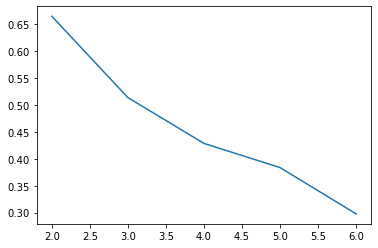

In [86]:
n = 20

key_vect = 'Word2vec2'
key_clust = 'Agglomer'
data_name = 'wiki'

param_meaning = list(range(2, 7))
ari_array = np.zeros(len(param_meaning))

data_vec = model_cluster_res[key_vect][key_clust]
data = data_vec[data_vec.label_ds == data_name]

for i in tqdm(range(len(param_meaning))):
    features = data.columns.tolist()[7:]
    model_clust = AgglomerativeClustering(n_clusters=param_meaning[i])
    data = clustering(model_clust, data, features)
    
    data['predict_sense_id'] = data['predict_sense_id'].astype("str")
    data['gold_sense_id'] = data['gold_sense_id'].astype("str")

    eval_ = Evaluation(data)
    ari, _ = eval_.main(print_words=False, print_table=False)
    
    ari_array[i] = ari
    
plt.plot(param_meaning, ari_array)

  0%|          | 0/5 [00:00<?, ?it/s]

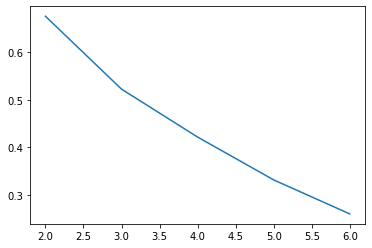

In [87]:
n = 20

key_vect = 'Word2vec2'
key_clust = 'KMeans'
data_name = 'wiki'

param_meaning = list(range(2, 7))
ari_array = np.zeros(len(param_meaning))

data_vec = model_cluster_res[key_vect][key_clust]
data = data_vec[data_vec.label_ds == data_name]

for i in tqdm(range(len(param_meaning))):
    features = data.columns.tolist()[7:]
    model_clust = KMeans(n_clusters=param_meaning[i])
    data = clustering(model_clust, data, features)
    
    data['predict_sense_id'] = data['predict_sense_id'].astype("str")
    data['gold_sense_id'] = data['gold_sense_id'].astype("str")

    eval_ = Evaluation(data)
    ari, _ = eval_.main(print_words=False, print_table=False)
    
    ari_array[i] = ari
    
plt.plot(param_meaning, ari_array)

#### btc

  0%|          | 0/5 [00:00<?, ?it/s]

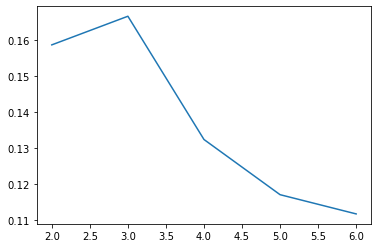

In [88]:
n = 20

key_vect = 'Word2vec2'
key_clust = 'Agglomer'
data_name = 'btc'

param_meaning = list(range(2, 7))
ari_array = np.zeros(len(param_meaning))

data_vec = model_cluster_res[key_vect][key_clust]
data = data_vec[data_vec.label_ds == data_name]

for i in tqdm(range(len(param_meaning))):
    features = data.columns.tolist()[7:]
    model_clust = AgglomerativeClustering(n_clusters=param_meaning[i])
    data = clustering(model_clust, data, features)
    
    data['predict_sense_id'] = data['predict_sense_id'].astype("str")
    data['gold_sense_id'] = data['gold_sense_id'].astype("str")

    eval_ = Evaluation(data)
    ari, _ = eval_.main(print_words=False, print_table=False)
    
    ari_array[i] = ari
    
plt.plot(param_meaning, ari_array)

  0%|          | 0/5 [00:00<?, ?it/s]

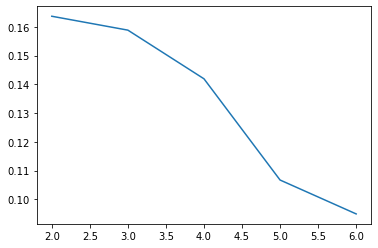

In [89]:
n = 20

key_vect = 'Word2vec2'
key_clust = 'KMeans'
data_name = 'btc'

param_meaning = list(range(2, 7))
ari_array = np.zeros(len(param_meaning))

data_vec = model_cluster_res[key_vect][key_clust]
data = data_vec[data_vec.label_ds == data_name]

for i in tqdm(range(len(param_meaning))):
    features = data.columns.tolist()[7:]
    model_clust = KMeans(n_clusters=param_meaning[i])
    data = clustering(model_clust, data, features)
    
    data['predict_sense_id'] = data['predict_sense_id'].astype("str")
    data['gold_sense_id'] = data['gold_sense_id'].astype("str")

    eval_ = Evaluation(data)
    ari, _ = eval_.main(print_words=False, print_table=False)
    
    ari_array[i] = ari
    
plt.plot(param_meaning, ari_array)

#### active

  0%|          | 0/5 [00:00<?, ?it/s]

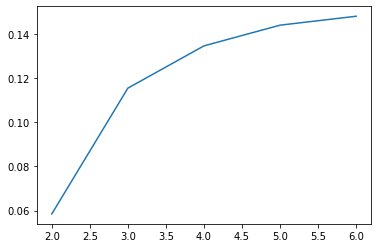

In [90]:
n = 20

key_vect = 'Word2vec2'
key_clust = 'Agglomer'
data_name = 'active'

param_meaning = list(range(2, 7))
ari_array = np.zeros(len(param_meaning))

data_vec = model_cluster_res[key_vect][key_clust]
data = data_vec[data_vec.label_ds == data_name]

for i in tqdm(range(len(param_meaning))):
    features = data.columns.tolist()[7:]
    model_clust = AgglomerativeClustering(n_clusters=param_meaning[i])
    data = clustering(model_clust, data, features)
    
    data['predict_sense_id'] = data['predict_sense_id'].astype("str")
    data['gold_sense_id'] = data['gold_sense_id'].astype("str")

    eval_ = Evaluation(data)
    ari, _ = eval_.main(print_words=False, print_table=False)
    
    ari_array[i] = ari
    
plt.plot(param_meaning, ari_array)

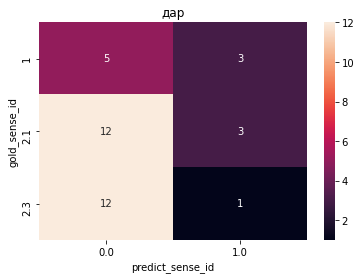

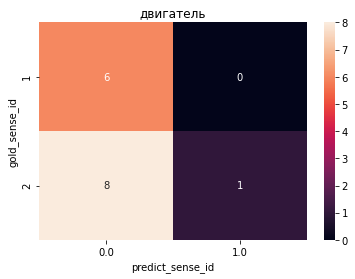

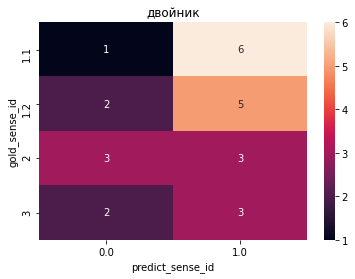

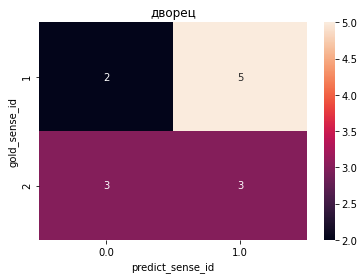

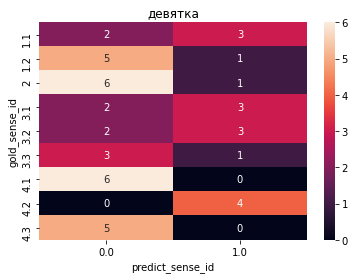

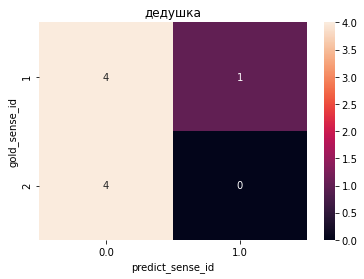

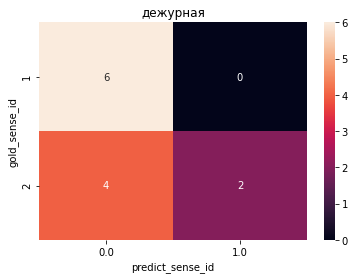

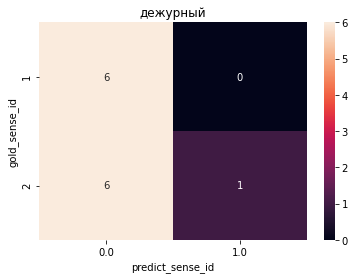

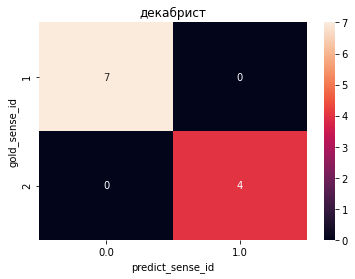

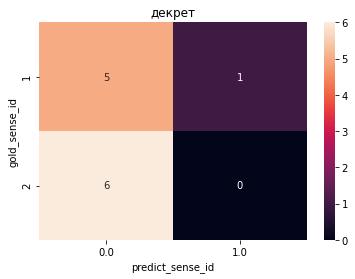

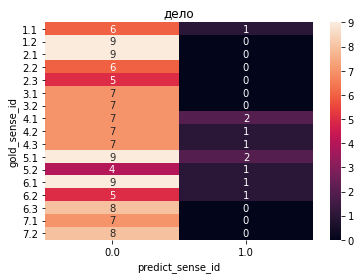

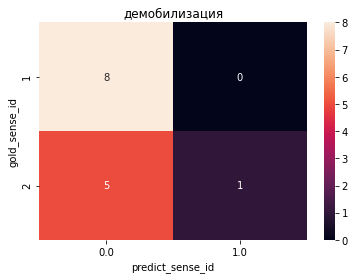

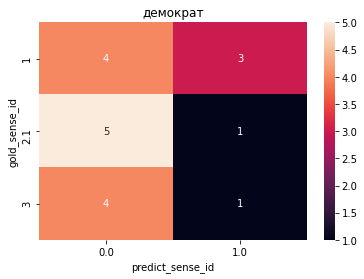

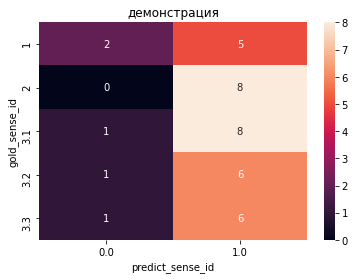

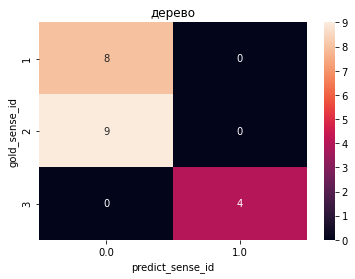

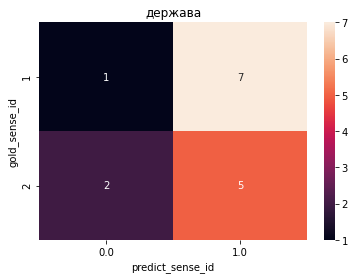

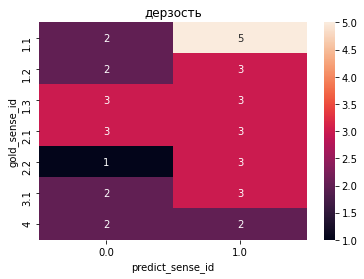

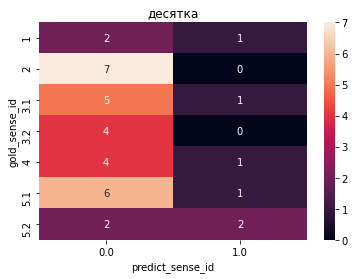

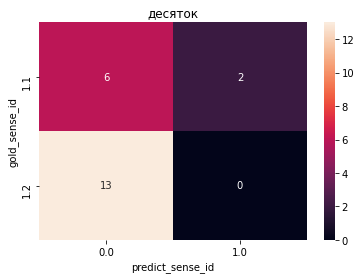

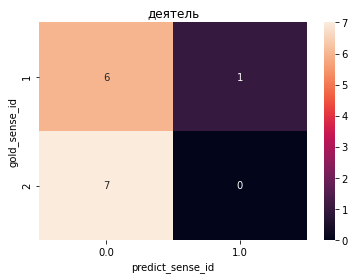

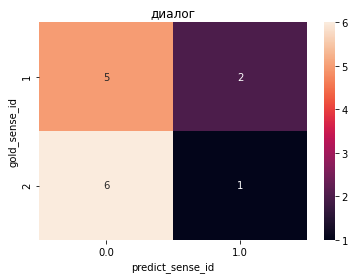

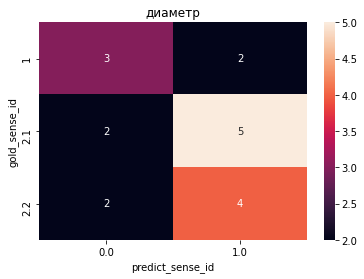

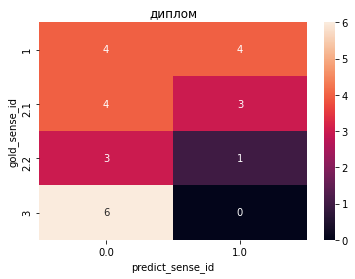

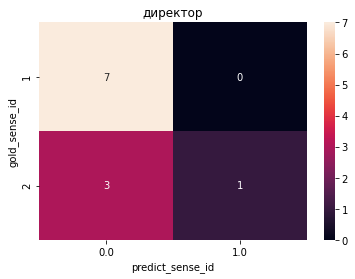

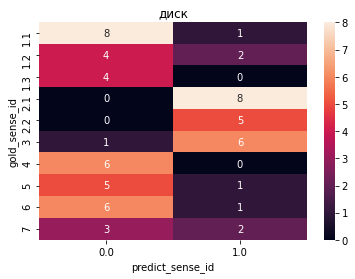

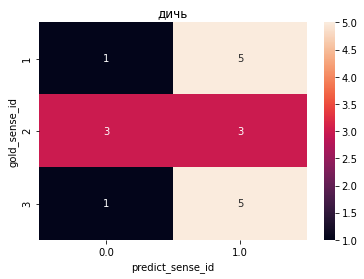

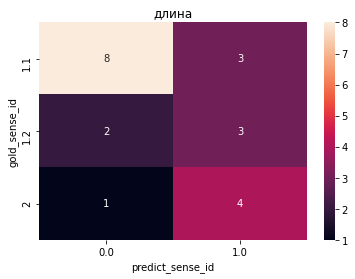

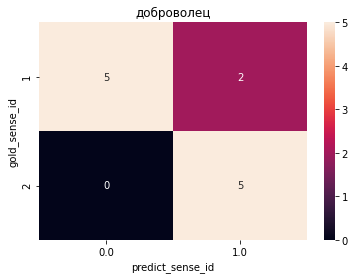

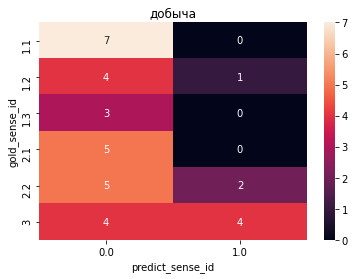

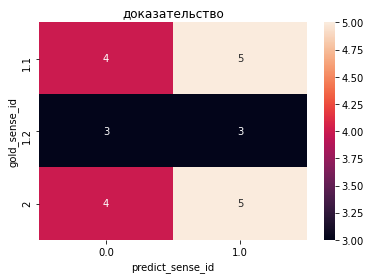

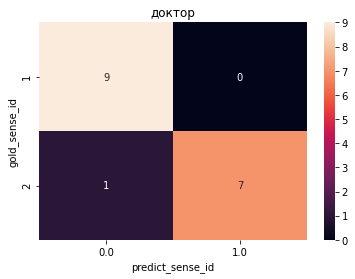

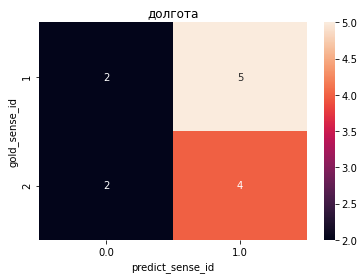

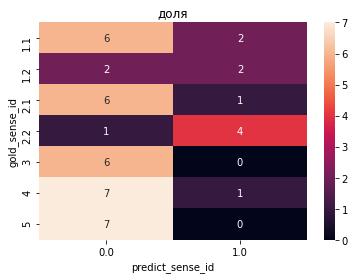

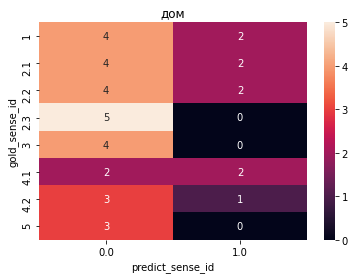

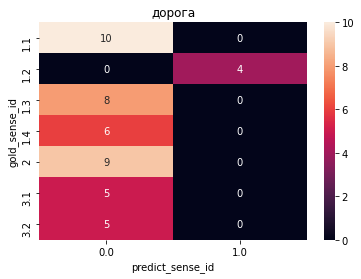

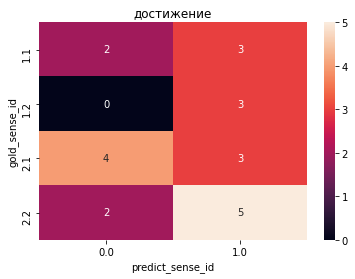

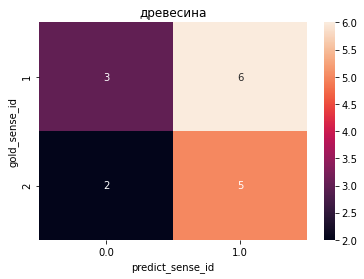

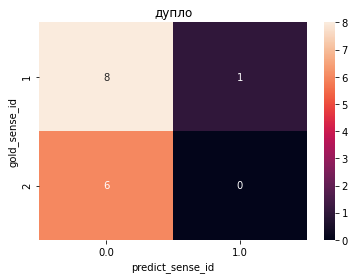

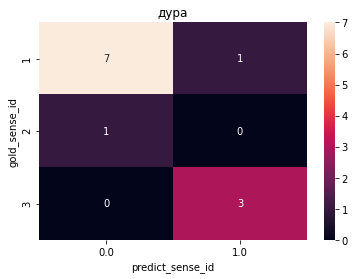

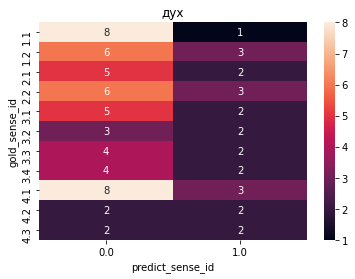

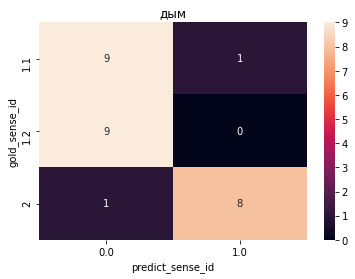

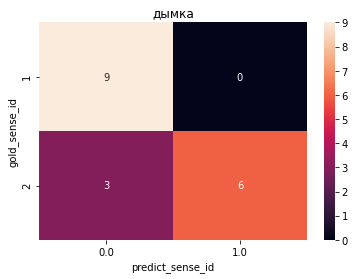

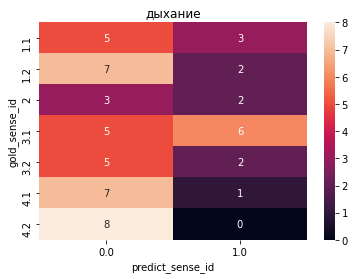

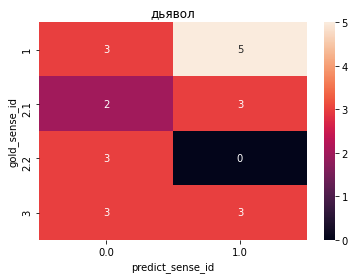

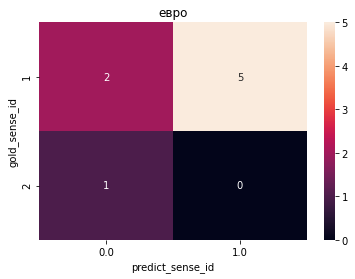

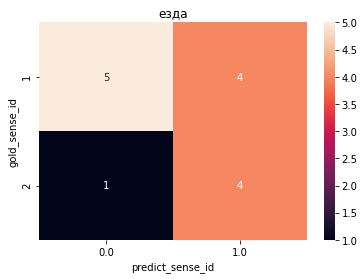

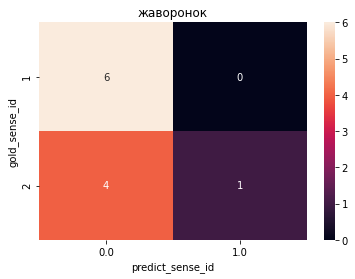

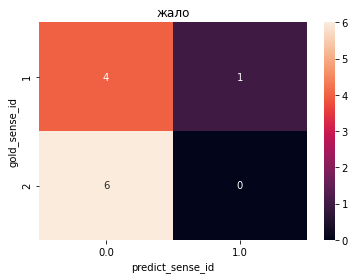

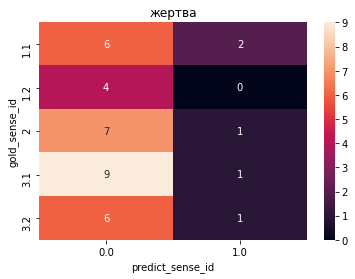

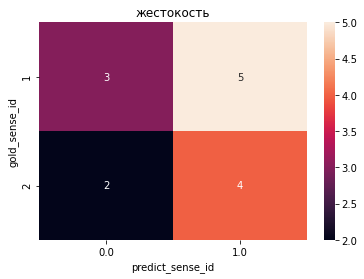

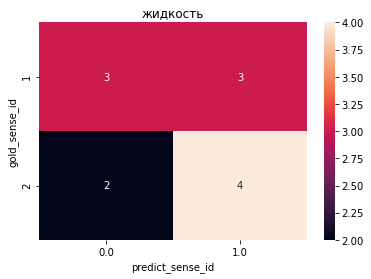

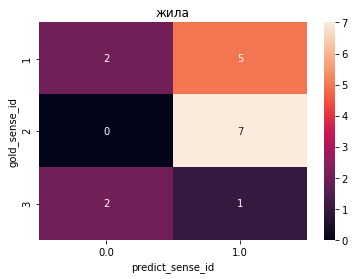

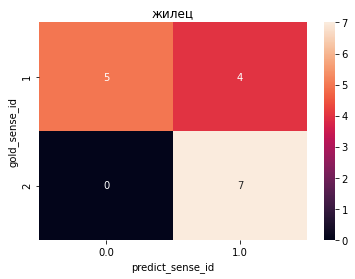

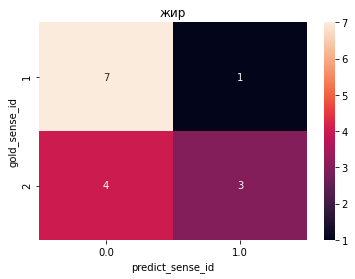

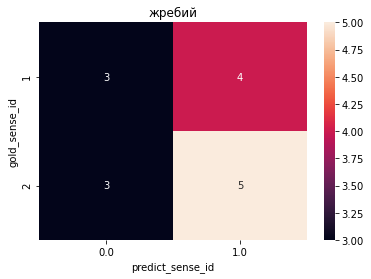

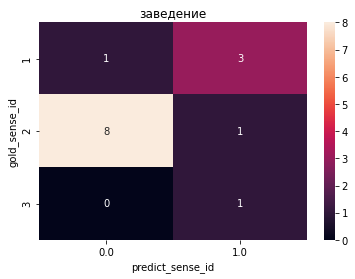

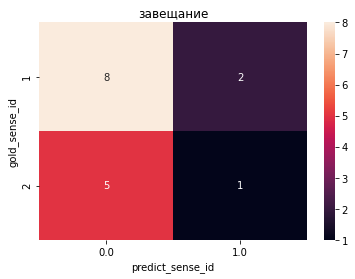

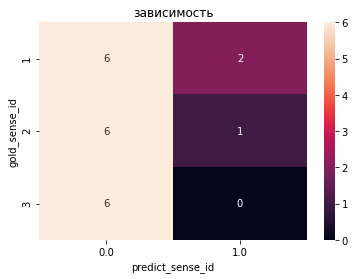

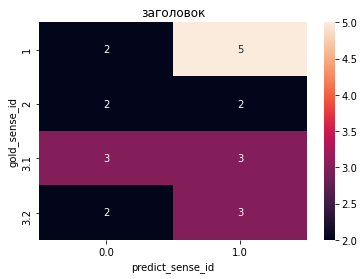

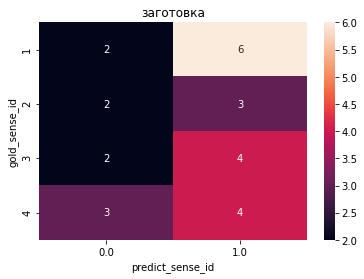

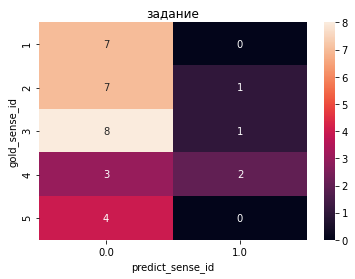

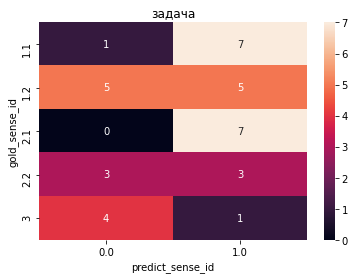

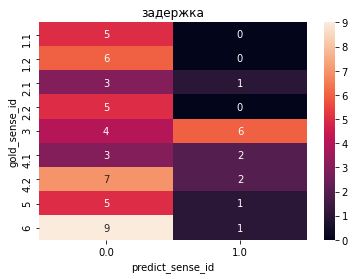

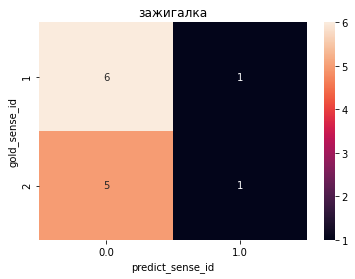

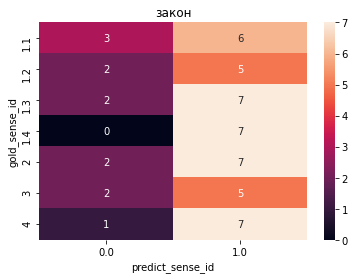

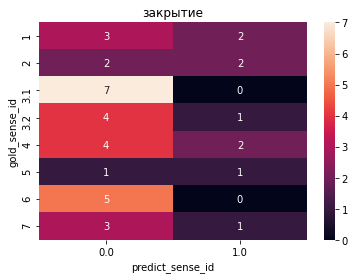

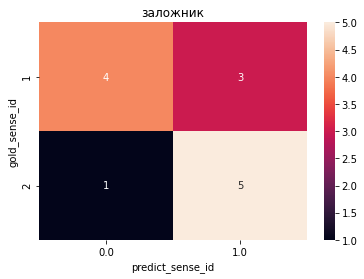

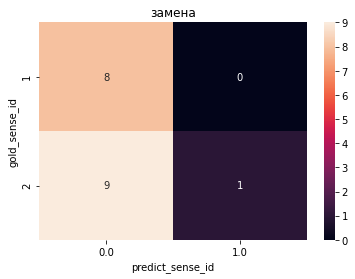

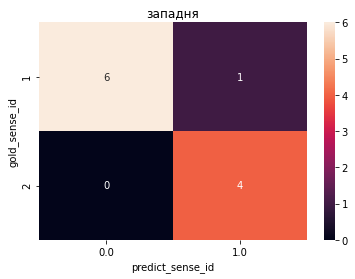

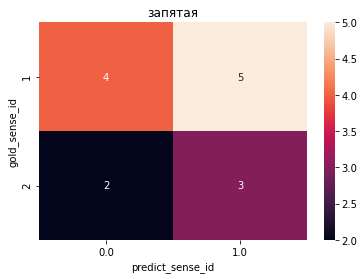

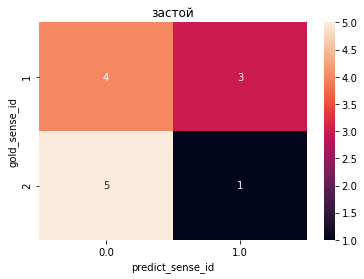

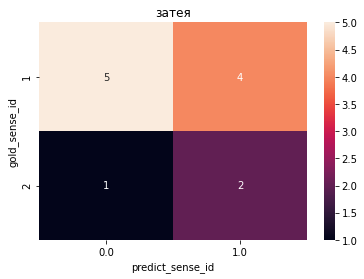

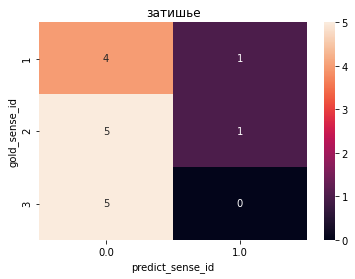

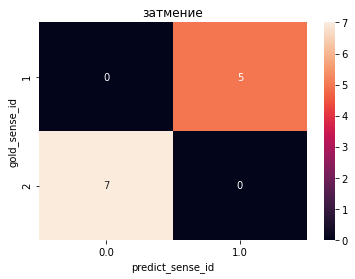

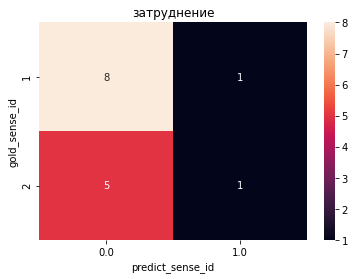

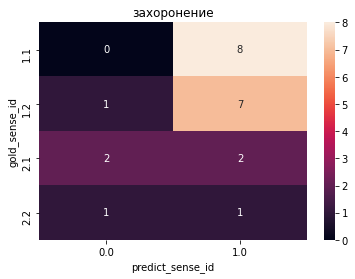

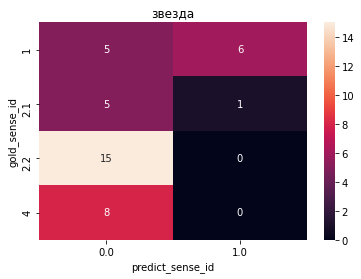

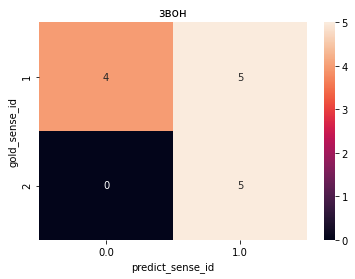

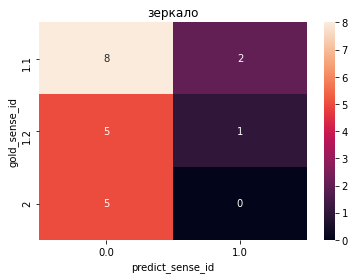

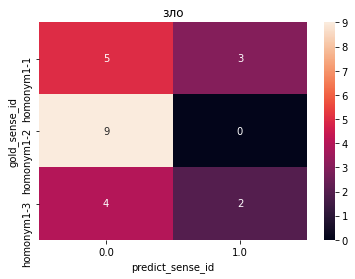

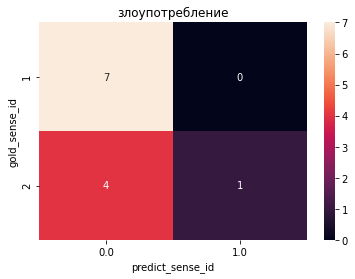

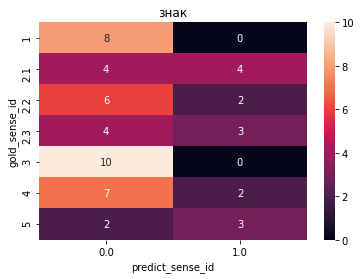

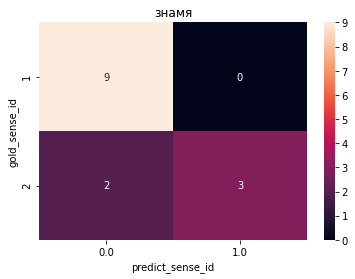

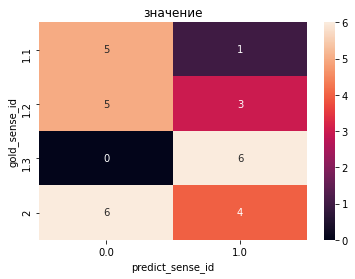

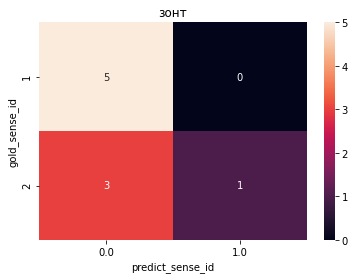

In [91]:
key_vect = 'Word2vec2'
key_clust = 'Agglomer'
data_name = 'active'

data_vec = model_cluster_res[key_vect][key_clust]
data = data_vec[data_vec.label_ds == data_name]

words = data.word.unique()
for word in words:
    data_word = data[data['word'] == word]
    sns.heatmap(pd.crosstab(data_word['gold_sense_id'], data_word['predict_sense_id']), annot=True)
    plt.title(word)
    plt.show()

In [92]:
data_vec.label_ds.unique()

array(['btc', 'wiki', 'active'], dtype=object)

### test prediction

In [93]:
top_vect_data = {'wiki': "Word2vec2",
                 'btc': "Word2vec2",
                 'active': "Word2vec2"}

# submit 5
# top_clust_method = {'wiki': KMeans(n_clusters=2),
#                  'btc': KMeans(n_clusters=3),
#                  'active': AgglomerativeClustering(n_clusters=5)}

#submit 6
# top_clust_method = {'wiki': AgglomerativeClustering(n_clusters=2),
#                  'btc': AgglomerativeClustering(n_clusters=3),
#                  'active': AffinityPropagation(max_iter = 400, random_state=5)}

#submit final
top_clust_method = {'wiki': KMeans(n_clusters=2),
                 'btc': AgglomerativeClustering(n_clusters=3),
                 'active': KMeans(n_clusters=5)}

for key in dict_adagram.keys():

    key_vect = top_vect_data[key]
    data_for_clust = dict_vect[key_vect].copy()
    data_for_clust = data_for_clust[~((data_for_clust.gold_sense_id != 'nan')&(data_for_clust.gold_sense_id.notna()))]
    data_for_clust = data_for_clust[data_for_clust.label_ds == key]

    features = data_for_clust.columns.tolist()[7:]
    model_clust = top_clust_method[key]

    dt_test_loc = clustering(model_clust, data_for_clust, features, scaling=True)

    dt_test_loc = dt_test_loc.sort_values(by='context_id')
    dt_test_loc.iloc[:, :6].to_csv(f"{path_to_data}test_petr_{key}_last.csv", index=False, sep = '\t')